## Idea of Content :-

   > 1. Dataset Overview
   > 2. Importing Data and Visualization(EDA)
   > 3. Data PreProcessing
   > 4. Model Building and Training 
   > 5. Model Comparison

# 1.Dataset Overview:
    This dataset includes 4,446,966 rows and 29 columns, comprising a total of 128,962,014 individual data points.

  >**groupId**: An integer used to identify a specific group within a match. Note that if the same players form a group in different matches, their groupId will differ.


  >**matchId**: An integer identifier for each match. Matches in the training and testing datasets are distinct, with no overlap.


  >**assists**: Counts the number of times a player assisted a teammate in securing a kill.


  >**boosts**: Reflects the number of boost items used.


   * **What are boosts?** Boosts include items such as Energy Drinks, Painkillers, and Adrenaline Syringes.
  >**Details**: The boost bar, located above the health bar, consists of four segments that fill up when a boost item is consumed. The first segment lasts for 1 minute and restores 1% health every 8 seconds, for a total of 7% health.
damageDealt: Total damage inflicted on opponents, excluding self-inflicted damage.


  >**DBNOs**: Tracks the number of opponents knocked down but not eliminated.
   * **Explanation**: DBNO stands for "Down But No Out," a state in duo or squad games where a player loses all health but can still be revived by teammates. In this state, players can crawl and drop items but cannot attack or heal themselves.
headshotKills: Total number of kills achieved via headshots.


  >**heals**: Counts the number of healing items used.


   * **Healing Items**: Bandages, First Aid Kits, and Med Kits are the primary health restoration tools in PUBG.


  >**killPlace**: The player's ranking in the match based on kills.


  >**killPoints**: An external ranking system based on kills, focusing solely on victories.


  >**kills**: The total number of enemy players killed.


  >**killStreaks**: Maximum number of consecutive kills achieved without dying.


  >**longestKill**: Measures the farthest distance between the player and their target at the time of a kill. Note: This value can sometimes be skewed, such as when a player knocks an opponent and moves away before the kill is completed.


  >**maxPlace**: Reflects the worst placement recorded in the match, which might not align with numGroups due to potential data gaps.


  >**numGroups**: Total number of groups in a given match.


  >**revives**: Number of times teammates were revived.


  >**rideDistance**: Total distance traveled in vehicles, measured in meters.


  >**roadKills**: Counts the number of opponents killed while traveling in a vehicle.


  >**swimDistance**: Total distance covered by swimming, measured in meters.


  >**teamKills**: The number of times a player killed their own teammate.


  >**vehicleDestroys**: Total vehicles destroyed.


  >**walkDistance**: Total distance traveled on foot, measured in meters.


  >**weaponsAcquired**: Number of weapons picked up during the match.


  >**winPoints**: External ranking based purely on winning outcomes.


#### Target Variable:

>**winPlacePerc**: The target variable for prediction, representing the winning placement as a percentile. A value of 1 indicates a 1st place finish, while 0 represents the last position.


### Feature Summary:
    Integer-based identifiers for players, groups, and matches.
    Discrete statistics such as assists, boosts, and headshotKills.
    Rankings derived from post-match calculations.
    Some inconsistencies are noted in features like rankPointsElo.

In [3]:
# Basic Imports

import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.  Importing Data and Visualization(EDA)

Reading the PUBG dataset 

In [4]:
data = pd.read_csv('pubg.csv')
data.head(12)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [5]:
data.shape

(4446966, 29)

### Dataset information

In [6]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


   > The majority of players play modestly, averaging fewer than one kill every game and using uncommon abilities like headshots and revives.

   > With an average of 685 meters each match, **walking is the main form of mobility**. Player preferences for sticking on foot are highlighted by the significantly lower prevalence of swimming and riding automobiles.

   > A select few outstanding players outperform the average in terms of skill, achieving remarkable outcomes like high damage dealt **(up to 6616 points)** or kill streaks of up to 20.

   > Since most players rank in the middle, winning is challenging. Road kills and car destruction are uncommon occurrences that create memorable gameplay experiences. The majority of players do mediocrely overall, although a tiny group.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [8]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

### Checking Null Values, Duplicates and Replacing Null values

In [9]:
data.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

***There is a single null value in target column so lets analys the data distribution and fill the null value***

<Axes: xlabel='winPlacePerc', ylabel='Count'>

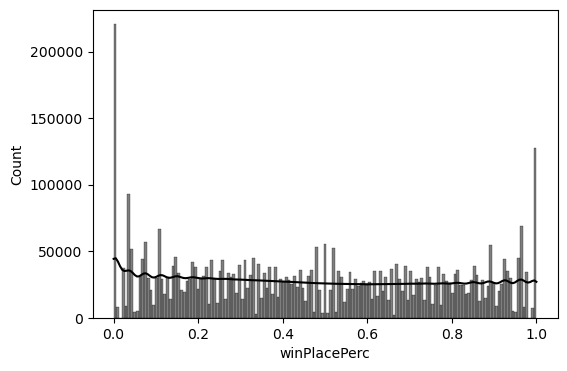

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(data,x='winPlacePerc',kde=True,color='black')

##### Since the column(winPlacePerc) with null value is skwed we can use median . Using Median, because it’s less sensitive to extreme values (outliers).

In [11]:
data["winPlacePerc"]=data["winPlacePerc"].fillna(data["winPlacePerc"].median())

In [12]:
#Rechecking for the null values

data.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

**After a check there are no null values. Null values are completely treated**

In [13]:
#checking for duplicate rows
data.duplicated().sum()

0

There are no duplicate rows . 


**Duplicate rows** - meaning each row is unique and represents distinct gameplay data for a player.

### Univariate analysis using sweetviz

In [14]:
# import sweetviz as sv
# my_report = sv.analyze(data)
# my_report.show_notebook()

### Let's drop the columns that are not directly relevent to the target column

In [15]:
data.drop(['Id', 'groupId','matchId'],axis=1,inplace=True)

   > These columns are unique identifiers for players, groups, and matches, and while they are essential for **uniquely identifying records**, they do not provide any meaningful contribution to gameplay analysis. For most statistical or machine learning tasks, these identifiers are **not relevant** because they don't **carry predictive or analytical value**. Removing them **reduces data complexity** and focuses on the features that are actually relevant for analysis or model training.

In [16]:
data.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

# EDA - Exploratory Data Analysis 

# Let's make use of visualization libraries to analyse each columns

#### Exploring Different Match Type
    PUBG offers 3 different game modes:

    * Solo - One can play alone
    * Duo - Play with a friend 
    * Squad - Play with 4 friends 
    
1) **First Person Perspective (FPP):**  The camera is placed at the player's eye level, providing a view as if you are seeing directly through the character's eyes.Offers a more immersive experience and fair gameplay because players can only see what their character can see, eliminating the ability to peek around corners or over obstacles without exposing themselves, but offers  Limited field of view.
              
              
2) **Third Person Perspective (TPP):**  The camera is positioned behind the character, allowing players to see their character's entire body and the area around them. Provides a broader view of the environment, enabling players to peek around corners or over walls without exposing themselves to danger.

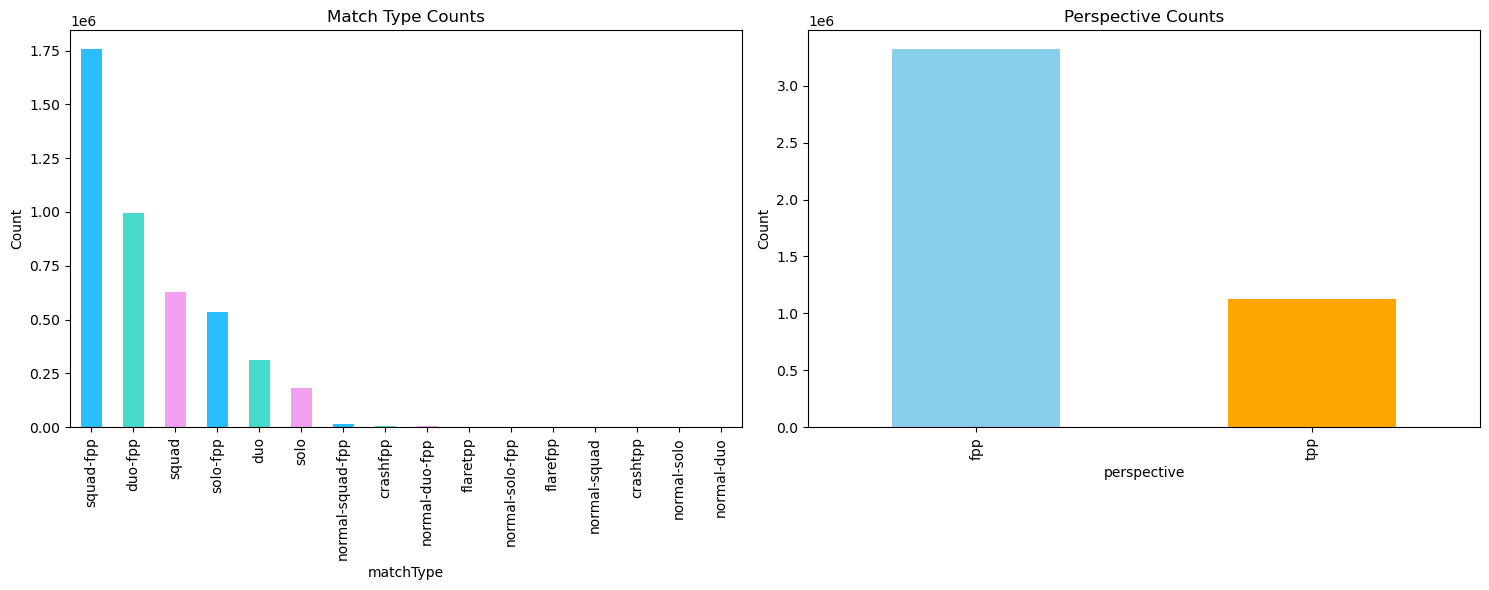

In [17]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
data['matchType'].value_counts().plot.bar(color=['#2CBDFE', '#47DBCD', "#F3A0F2"])
plt.title('Match Type Counts')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
data['perspective'] = data['matchType'].str.contains('fpp').replace({True: 'fpp', False: 'tpp'})
data['perspective'].value_counts().plot.bar(color=['skyblue', 'orange'])
plt.title('Perspective Counts')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### Match Type Distribution:

   > The majority of matches are played in **squad-fpp mode**.
   
   > Modes like **solo, duo, and normal** have significantly fewer matches.
   
### Perspective Distribution:

   > Players prefer **First-Person Perspective (FPP)** over Third-Person Perspective (TPP).
   
   > This could reflect player preferences or game mode popularity.

### Player Analysis

>During a game, 100 players join the same server

   * In the case of duos the max teams are 50
   * In the case of squads the max teams are 25
   
But we can customise the team size (maximum of 4, minimum of 1)

In [18]:
import itertools

In [19]:
def mergeList(list1,list2):
    return list(itertools.product(list1,list2))
match = data.groupby(['matchType']).size().to_frame('Players in Match')
group = data.groupby(['matchType']).size().to_frame('Players in Group')
pd.concat([match.groupby('matchType').describe()[mergeList(['Players in Match'],['min','mean','max'])], 
           group.groupby('matchType').describe()[mergeList(['Players in Group'],['min','mean','max'])]], axis=1)

Players in Match                       Players in Group  \
                              min       mean        max              min   
matchType                                                                  
crashfpp                   6287.0     6287.0     6287.0           6287.0   
crashtpp                    371.0      371.0      371.0            371.0   
duo                      313591.0   313591.0   313591.0         313591.0   
duo-fpp                  996691.0   996691.0   996691.0         996691.0   
flarefpp                    718.0      718.0      718.0            718.0   
flaretpp                   2505.0     2505.0     2505.0           2505.0   
normal-duo                  199.0      199.0      199.0            199.0   
normal-duo-fpp             5489.0     5489.0     5489.0           5489.0   
normal-solo                 326.0      326.0      326.0            326.0   
normal-solo-fpp            1682.0     1682.0     1682.0           1682.0   
normal-squad                516.0      516.0      516.0            516.0   
normal-squad-fpp          17174.0    17174.0    17174.0          17174.0   
solo                     181943.0   181943.0   181943.0         181943.0   
solo-fpp                 536762.0   536762.0   536762.0         536762.0   
squad                    626526.0   626526.0   626526.0         626526.0   
squad-fpp               1756186.0  1756186.0  1756186.0        1756186.0   

                                        
                       mean        max  
matchType                               
crashfpp             6287.0     6287.0  
crashtpp              371.0      371.0  
duo                313591.0   313591.0  
duo-fpp            996691.0   996691.0  
flarefpp              718.0      718.0  
flaretpp             2505.0     2505.0  
normal-duo            199.0      199.0  
normal-duo-fpp       5489.0     5489.0  
normal-solo           326.0      326.0  
normal-solo-fpp      1682.0     1682.0  
normal-squad          516.0      516.0  
normal-squad-fpp    17174.0    17174.0  
solo               181943.0   181943.0  
solo-fpp           536762.0   536762.0  
squad              626526.0   626526.0  
squad-fpp         1756186.0  1756186.0

In [20]:
print(group['Players in Group'].nlargest(5))

matchType
squad-fpp    1756186
duo-fpp       996691
squad         626526
solo-fpp      536762
duo           313591
Name: Players in Group, dtype: int64


### Kills

In [21]:
df = data.copy()
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['matchType'] = label.fit_transform(df['matchType'])

- **`df = data.copy()`**  - So that i don't change anything in original dataset.
- **`LabelEncoder()`** - Here we just labeled the matchType column and it will be usefull in futher visualization part.

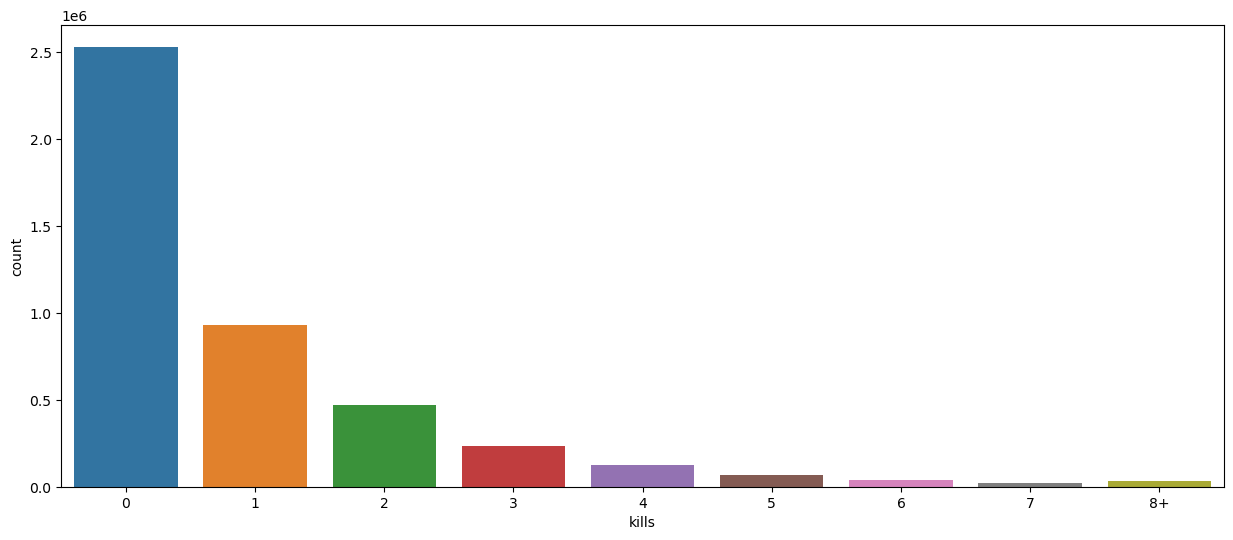

In [22]:
df['kills'] = pd.to_numeric(df['kills'], errors='coerce')
df.loc[df['kills'] > df['kills'].quantile(0.99), 'kills'] = '8+'
df['kills'] = df['kills'].astype(str)

# Plot the data
plt.figure(figsize=(15, 6))
sns.countplot(x=df['kills'].sort_values())
plt.show()

**Seems like most of the player has zero kills and it seems to be there are lots of zeros in the dataset. So while training the data we should consider the zeros too.**

In [23]:
print(df[df['kills'].isna()])

Empty DataFrame
Columns: [assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, killPoints, kills, killStreaks, longestKill, matchDuration, matchType, maxPlace, numGroups, rankPoints, revives, rideDistance, roadKills, swimDistance, teamKills, vehicleDestroys, walkDistance, weaponsAcquired, winPoints, winPlacePerc, perspective]
Index: []

[0 rows x 27 columns]


### Damage_Dealt

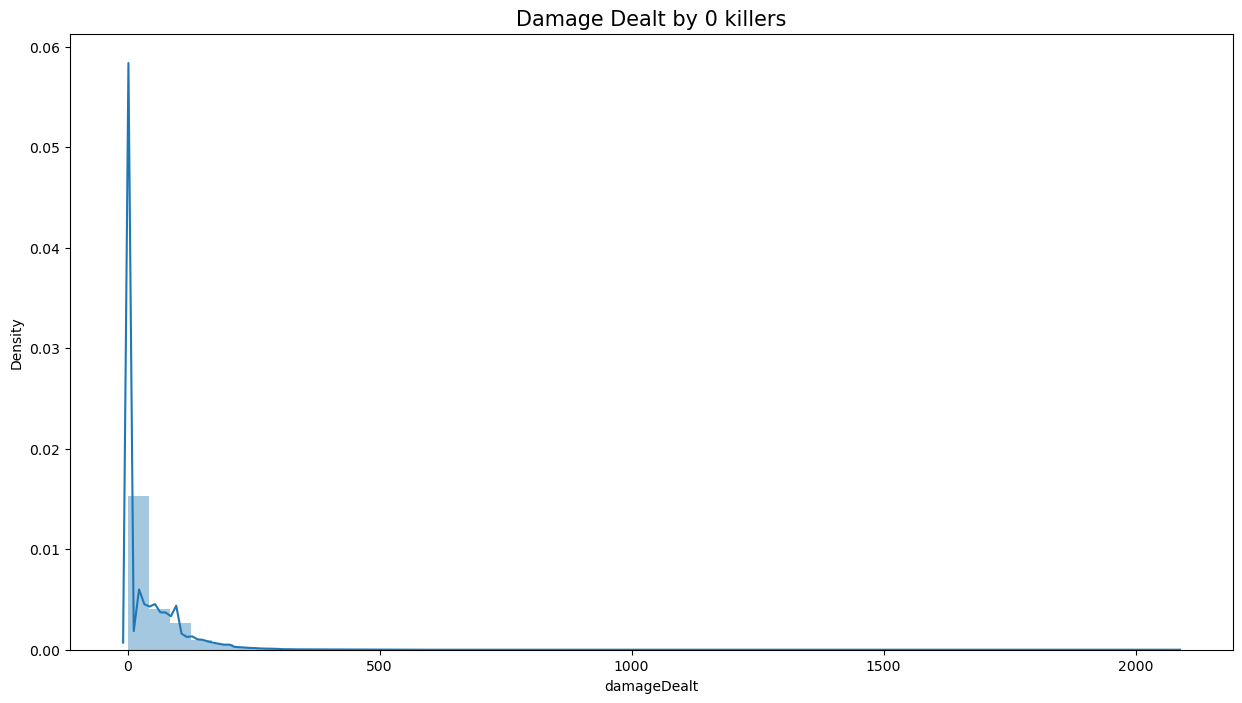

In [24]:
Damage_Data = data[data['kills']==0]
plt.figure(figsize=(15,8))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(Damage_Data['damageDealt'])
plt.show()

##### There are few players with damage but without single kill.

In [25]:
playerswon_withoutkills = len(df[df['winPlacePerc'] == 1])
#percentage of players won without kills
percentagewon_withoutkills = (playerswon_withoutkills / len(df)) * 100
print("Players who won without a single kill: {} ({:.4f}%)".format(playerswon_withoutkills, percentagewon_withoutkills))
players_zero_damage = df[df['damageDealt'] == 0].copy()
players_won_wo_damage = len(players_zero_damage[players_zero_damage['winPlacePerc'] == 1])
percentage_won_wo_damage = (players_won_wo_damage / len(df)) * 100
print("Players who won without dealing damage: {} ({:.4f}%)".format(players_won_wo_damage, percentage_won_wo_damage))

Players who won without a single kill: 127573 (2.8688%)
Players who won without dealing damage: 4770 (0.1073%)


   > There are 12 **Thousand plus players** who won without a single kill , which is a **2.8688%** of total players played

   > There are 4 **Thousand plus players** who won without dealing damage , which is a **0.1073%** of total players played

### KillsEffect on Target Columns(winPlacePerc)

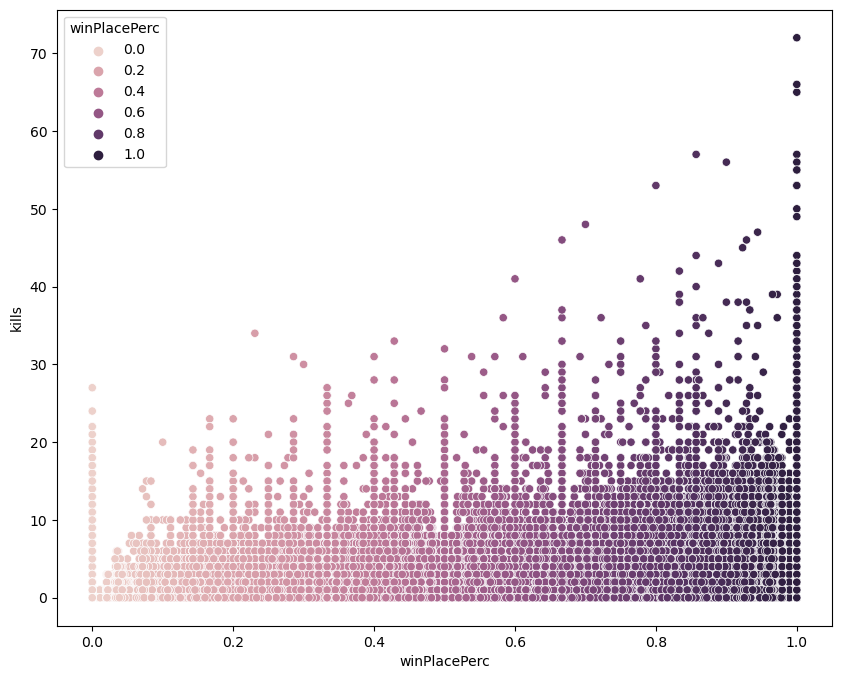

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(y=data['kills'], x= data["winPlacePerc"], hue=data["winPlacePerc"])
plt.show()

   > WinPlacePrec has high correlation with Kills

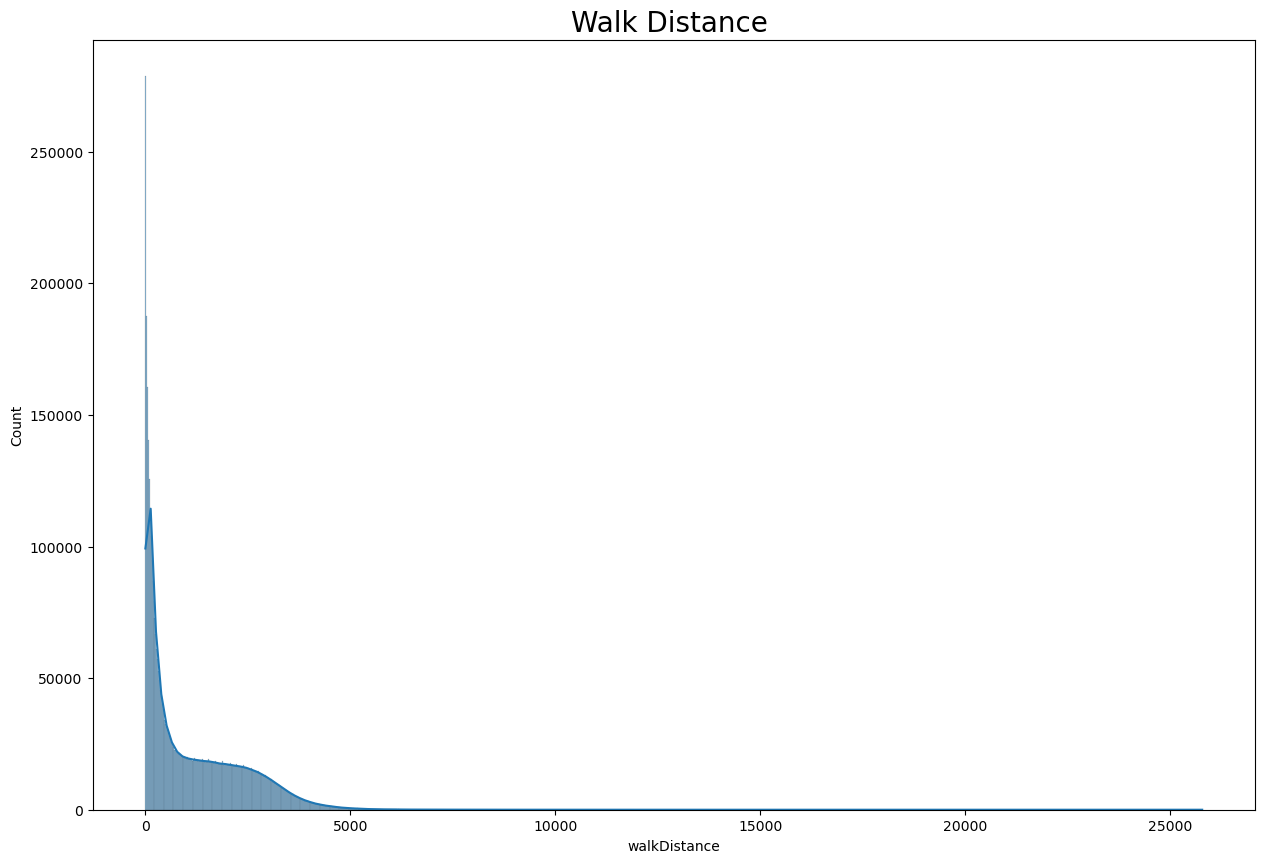

In [27]:
plt.figure(figsize=(15,10))
plt.title("Walk Distance ",fontsize=20)
sns.histplot(data['walkDistance'], kde=True)
plt.show()

#### WalkDistance is strongly correlated with winPlacePerc.
   * The longer you survive in the game, the more likely you are to either achieve your ultimate goal (winning the Chicken Dinner) or contribute to someone else's success as a resource.

### Ride Distance

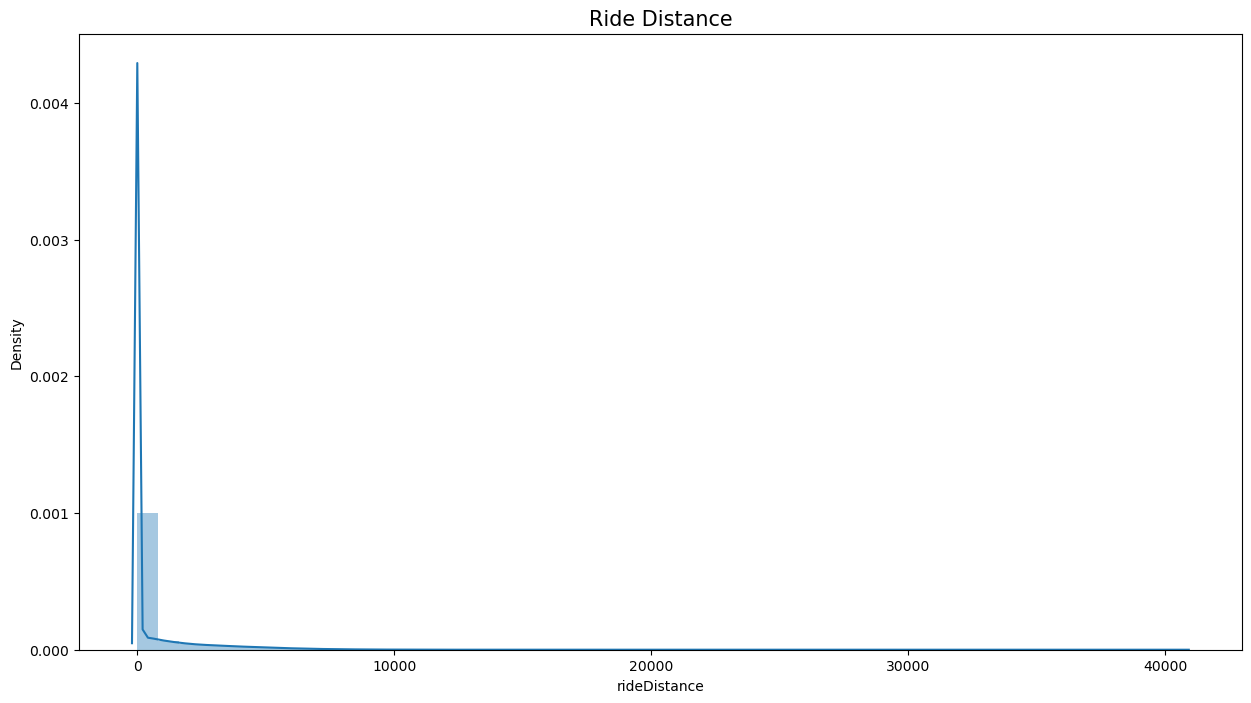

In [28]:
plt.figure(figsize=(15,8))
plt.title("Ride Distance",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

   **The plot shows that most players have very low ride distances, indicating minimal use of vehicles. A few outliers covered significant distances, suggesting a vehicle-heavy strategy. Overall, players likely relied more on walking or staying in smaller zones.**

   > So, droping   **rideDistance**

### WinPlacePerc  vs VehicleDestroys analysis

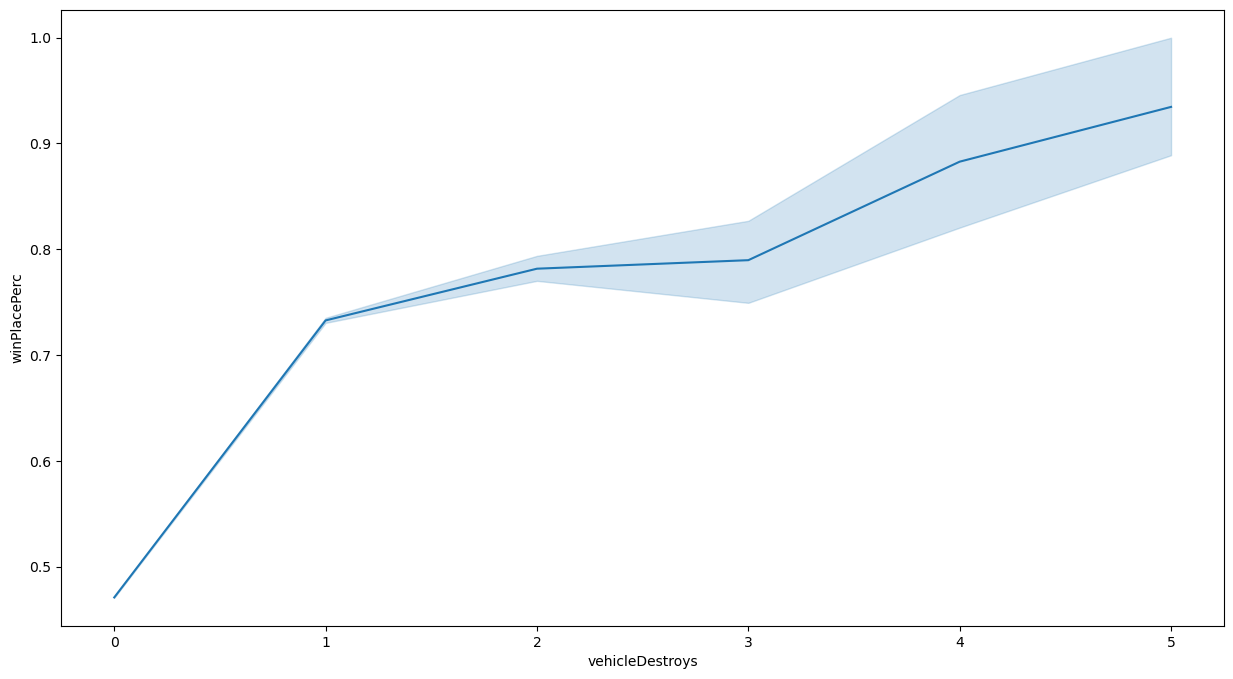

In [29]:
plt.figure(figsize=(15,8))
sns.lineplot(x='vehicleDestroys',y='winPlacePerc',data=data)
plt.show()

#### Destroying vehicles increases the chances of winning!

### Healing and Boosting Analization

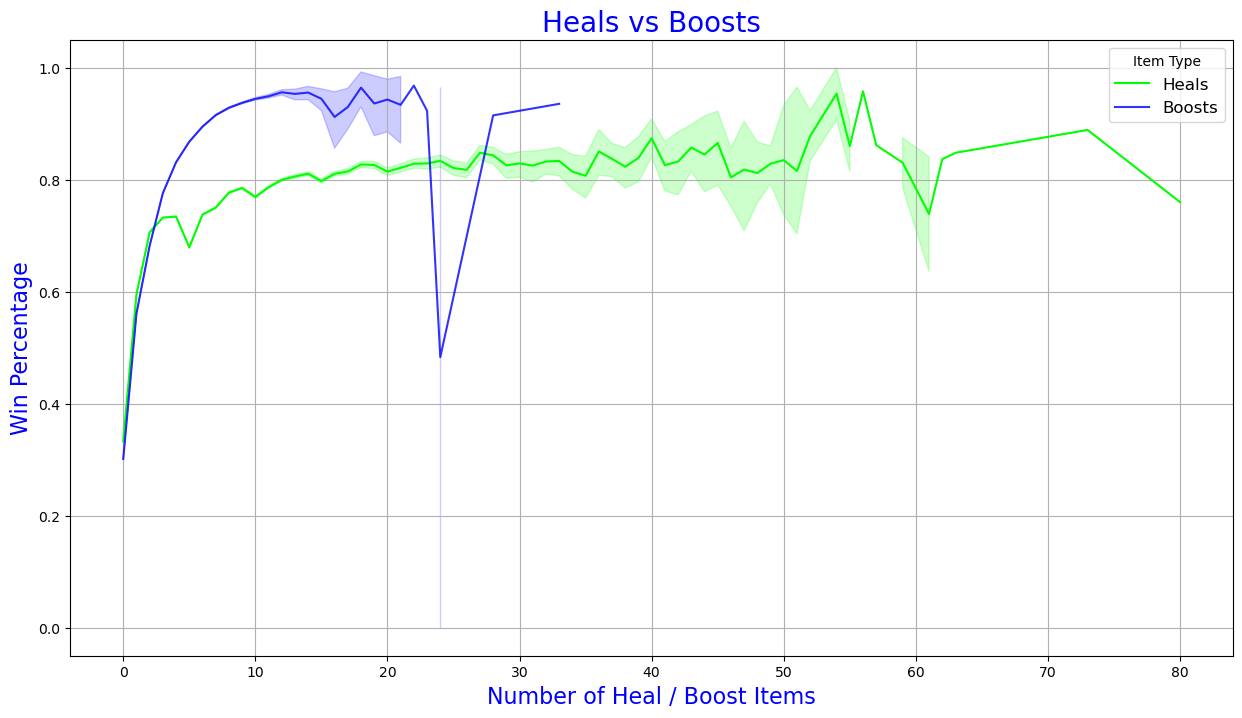

In [30]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='heals', y='winPlacePerc', data=data, label='Heals', color='lime')
sns.lineplot(x='boosts', y='winPlacePerc', data=data, label='Boosts', color='blue', alpha=0.8)
plt.xlabel('Number of Heal / Boost Items', fontsize=16, color='blue')
plt.ylabel('Win Percentage', fontsize=16, color='blue')
plt.title('Heals vs Boosts', fontsize=20, color='blue')
plt.legend(title="Item Type", fontsize=12)
plt.grid()
plt.show()

   * A noticeable dip in the boosts curve suggests potential data issues or inefficiencies in strategy for players using many boosts. Heals show a consistent improvement, supporting sustained play, while boosts offer immediate benefits. Optimizing the use of these items, rather than overusing them, can enhance game outcomes. 
   * In conclusion, removing either column depends on whether you want to emphasize short-term (boosts) or long-term (heals) strategies, but removing one could still provide a clear insight into their individual effects.

### So,  removing "Boost"
**why removing 'Boost':**

   > The boosts column shows a sharp rise and then a dip in the win percentage, indicating diminishing returns and some potential noise or data anomalies.
   
   > The heals column shows a smoother, more consistent positive trend and provides a steadier indication of sustained performance.
   
   
Removing boosts will allow you to focus on the more reliable, consistent relationship between heals and win percentage, which seems to provide clearer insights into long-term strategic value.

### SwimDistance Analysis

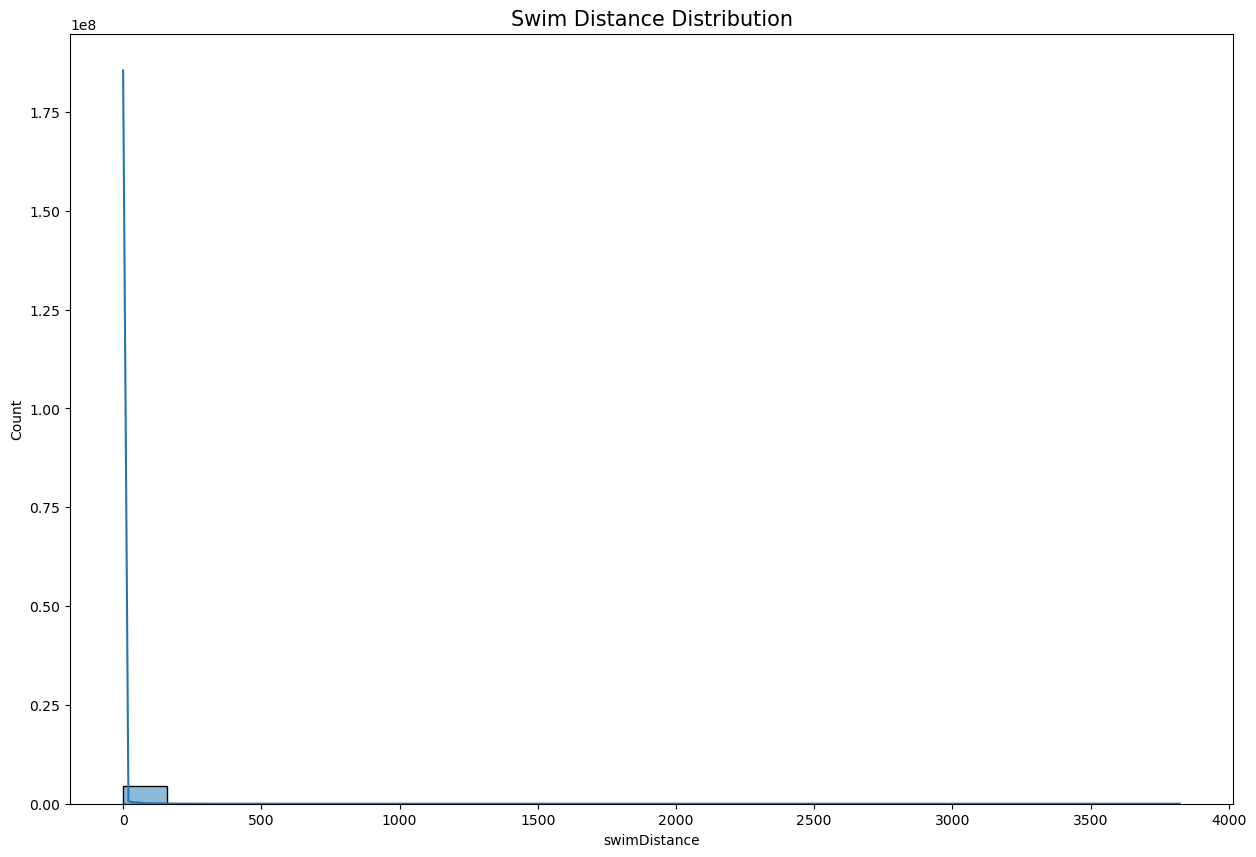

In [31]:
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.histplot(data['swimDistance'], kde=True)
plt.show()

#### from the above hisplot , removing this(swimDistance) column because it does not contribute meaningfully to predicting the target variable 

   > So, let's drop **swimDistance**
   
We can remove the high outlier and plot the histplot, even if we do , still the column will hold high outlier values and it does not contribute meaningfully to predicting the target column

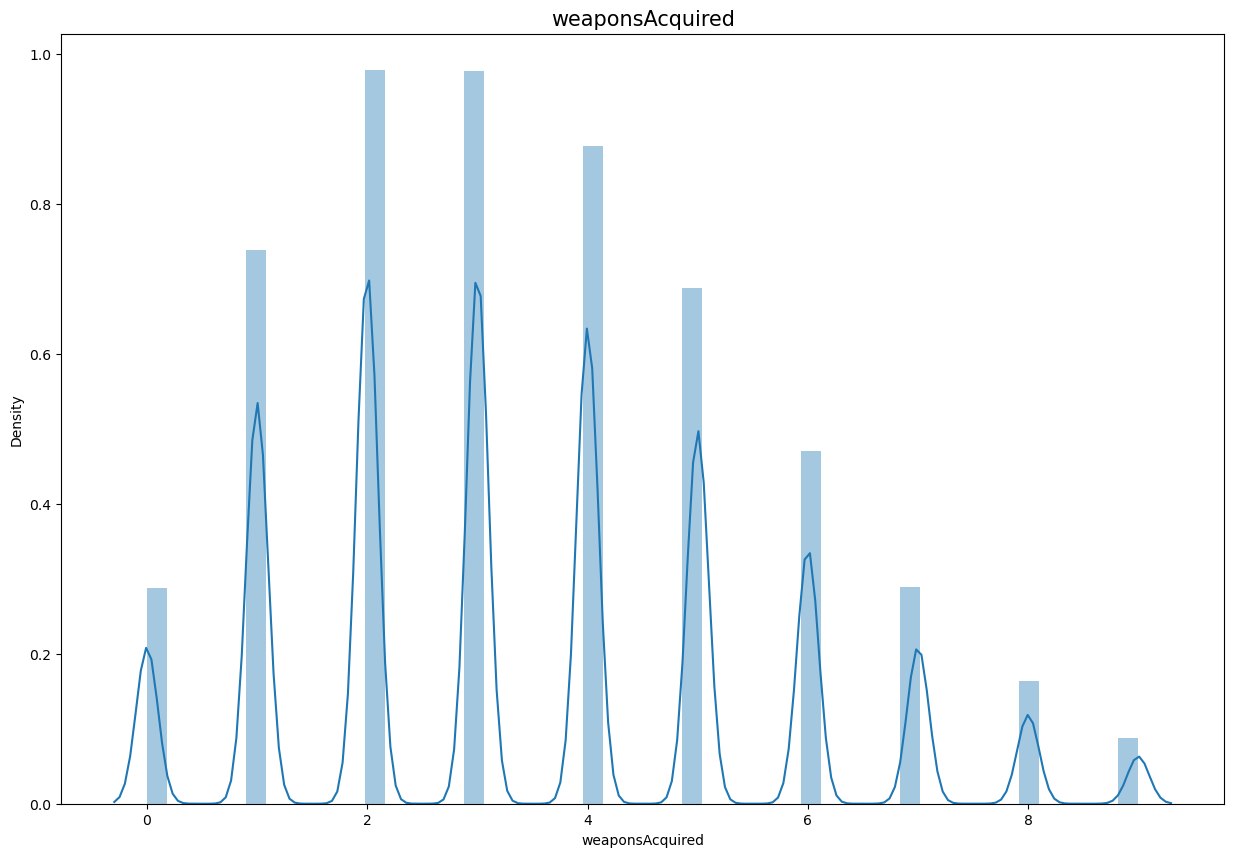

In [32]:
df = data.copy()
df1 = df[df['weaponsAcquired'] < data['weaponsAcquired'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("weaponsAcquired",fontsize=15)
sns.distplot(df1['weaponsAcquired'])
plt.show()

* df = data.copy()
* df1 = df[df['weaponsAcquired'] < data['weaponsAcquired'].quantile(0.99)]

##### This removes the high outliers from the dataset, ensuring that the distribution plot focuses on the majority of the data. This often makes the visualization more interpretable and less skewed.


Even after removing the high outliers from the data , the plot shows there is a tapering-off of values as the number of weapons acquired increases, meaning higher values (e.g., >8) are relatively rare.

   > So, let's drop **weaponsAcquired**

###  Kills versus Revives Analysis

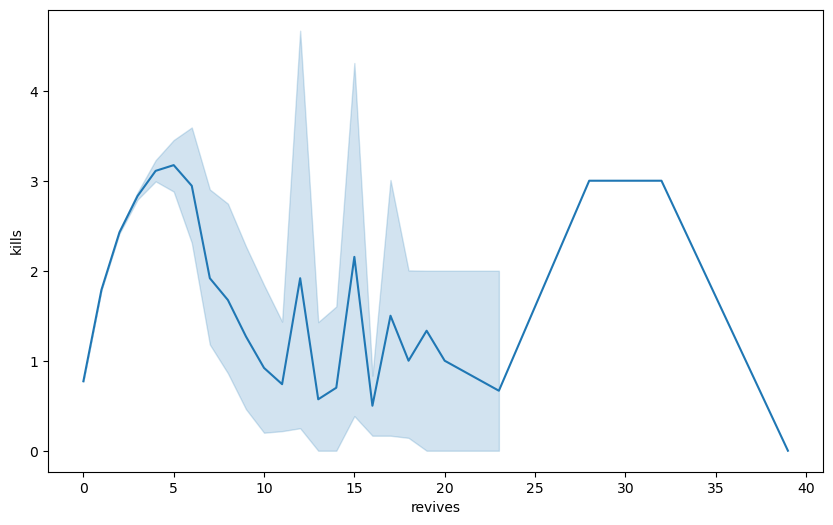

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data,x='revives',y='kills')
plt.show()

The lineplot shows a positive correlation between revives and kills, suggesting that players who revive teammates often get more kills. However, the relationship is not perfectly linear, indicating other factors influence kill counts. **This column could provide valuable insights into player strategies and gameplay dynamics**.

### winPlacePerc versus vehicleDestroys

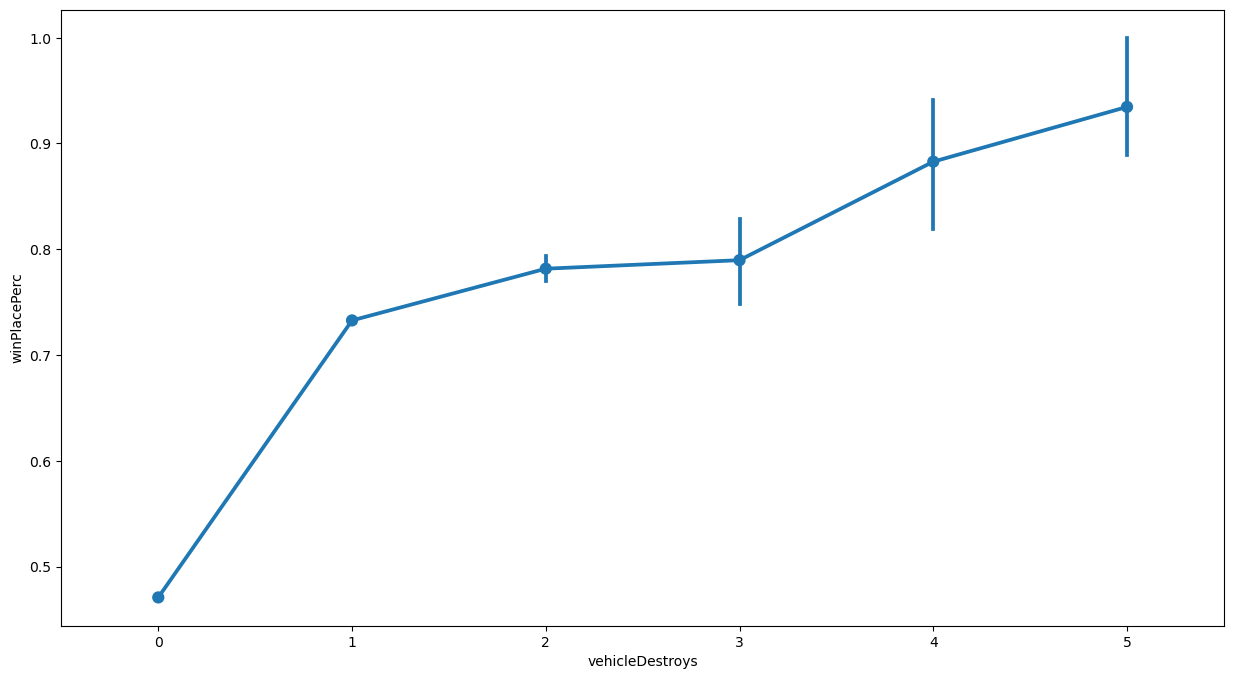

In [34]:
plt.figure(figsize=(15,8))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data)
plt.show()

**From the above plot we can clearly say vehicleDestroys helps in predicting Target column(winPlacePerc)**

### NumberGroups versus MatchDuration

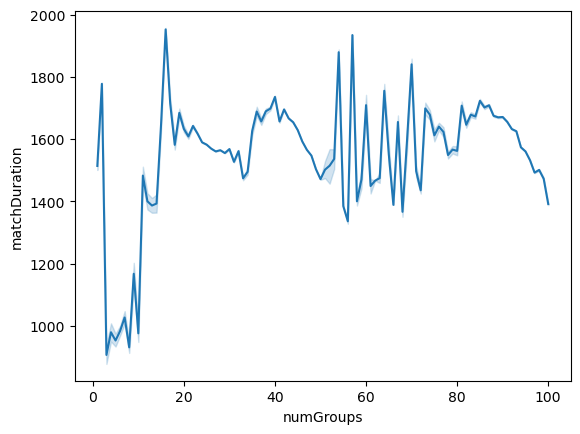

In [35]:
sns.lineplot(data=data,x="numGroups", y="matchDuration")
plt.show()

**The plot shows a decreasing trend in match duration with increasing number of groups. However, the trend is not consistent. 
So, Let's Drop this columns.**

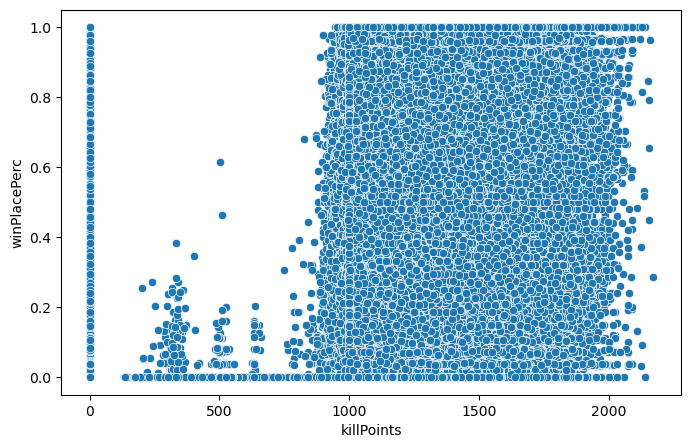

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='killPoints',y='winPlacePerc')
plt.show()

**From the above plot we could say the contribution is not highly correlating to Target column(winPlacePerc)**

   > So, Let's drop **killPoints**

### From the above EDA ,columns like rideDistance, boost, swimDistance, numGroups, matchDuration, killPoints, winPoints, teamKills and roadKills  has either no contribution or the features has linear correlation. 

   > So, Let's drop them

In [37]:
data.drop(['rideDistance', 'boosts', 'swimDistance', 'killPoints', 'winPoints', 'teamKills' ,'roadKills'],axis=1,inplace=True)

#### Lets plot the heatmap to get clear vision about the above correlated columns.


   To gain a clearer understanding of the relationships between the variables in the dataset, we will plot a heatmap. Before doing so, it is essential to differentiate between numerical and categorical columns to ensure appropriate data preprocessing and correlation analysis.

# 3. Data PreProcessing

## Numerical Data Analysis and PreProcessing

In [38]:
numerical_data = data.select_dtypes(['float','int'])
numerical_data

,assists,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0,0.00,0,0,0,60,0,0,0.00,1306,28,26,-1,0,0,244.80,1,0.4444
1,0,91.47,0,0,0,57,0,0,0.00,1777,26,25,1484,0,0,1434.00,5,0.6400
2,1,68.00,0,0,0,47,0,0,0.00,1318,50,47,1491,0,0,161.80,2,0.7755
3,0,32.90,0,0,0,75,0,0,0.00,1436,31,30,1408,0,0,202.70,3,0.1667
4,0,100.00,0,0,0,45,1,1,58.53,1424,97,95,1560,0,0,49.75,2,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0.00,0,0,0,74,0,0,0.00,1873,29,28,-1,0,0,1019.00,3,0.1786
4446962,0,44.15,0,0,0,69,0,0,0.00,1435,93,93,1501,0,0,81.70,6,0.2935
4446963,0,59.06,0,0,0,66,0,0,0.00,1321,28,28,1500,0,0,788.70,4,0.4815
4446964,0,180.40,1,1,2,11,2,1,98.50,1373,26,25,1418,2,0,2748.00,8,0.8000


In [39]:
correlation = data.select_dtypes(include=['int', 'float']).corr()
correlation

,assists,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
assists,1.000000,0.406726,0.301057,0.198289,0.228556,-0.290062,0.319690,0.243471,0.261425,-0.019450,-0.147916,-0.146804,-0.016407,0.198320,0.057921,0.290306,0.243882,0.299441
damageDealt,0.406726,1.000000,0.735763,0.613409,0.342987,-0.677398,0.888783,0.703599,0.563837,-0.006755,-0.040707,-0.040078,-0.001460,0.256951,0.081182,0.398199,0.353249,0.440507
DBNOs,0.301057,0.735763,1.000000,0.469923,0.265485,-0.555289,0.707848,0.646872,0.451422,-0.014485,-0.267709,-0.265788,-0.003451,0.300999,0.060210,0.284660,0.218161,0.279970
headshotKills,0.198289,0.613409,0.469923,1.000000,0.199918,-0.469829,0.674275,0.512882,0.447261,-0.017657,0.009211,0.009389,0.005118,0.150145,0.039200,0.250982,0.217552,0.277722
heals,0.228556,0.342987,0.265485,0.199918,1.000000,-0.386032,0.311781,0.270412,0.263278,0.108901,-0.064759,-0.064204,0.019142,0.236680,0.062870,0.430266,0.309071,0.427857
killPlace,-0.290062,-0.677398,-0.555289,-0.469829,-0.386032,1.000000,-0.730498,-0.810516,-0.541146,-0.005804,0.016792,0.018786,-0.014805,-0.269804,-0.073569,-0.590236,-0.490143,-0.719069
kills,0.319690,0.888783,0.707848,0.674275,0.311781,-0.730498,1.000000,0.802500,0.602936,-0.030687,-0.004847,-0.004060,0.008199,0.253323,0.079991,0.374774,0.336414,0.419916
killStreaks,0.243471,0.703599,0.646872,0.512882,0.270412,-0.810516,0.802500,1.000000,0.515097,-0.034644,-0.037338,-0.036054,0.003426,0.241695,0.064374,0.327639,0.275373,0.377566
longestKill,0.261425,0.563837,0.451422,0.447261,0.263278,-0.541146,0.602936,0.515097,1.000000,0.056614,-0.018189,-0.017701,0.016997,0.170134,0.083227,0.413810,0.276264,0.410154
matchDuration,-0.019450,-0.006755,-0.014485,-0.017657,0.108901,-0.005804,-0.030687,-0.034644,0.056614,1.000000,0.044669,0.036845,0.088013,0.016990,0.060924,0.145063,0.129081,-0.005171


##### _matchDuration, maxPlace, numGroups and rankPoints , this columns are not so correlated_




- **matchDuration:** No meaningful correlation with the target and doesn't reflect player performance.
- **rankPoints:** Adds no unique information; barely connected to placement.
- **maxPlace / numGroups:** High redundancy (0.998 correlation); retaining both is unnecessary.

    > So, Let's drop them

In [40]:
data.drop(['matchDuration','maxPlace','numGroups' ,'rankPoints'],axis=1,inplace=True)

In [41]:
data.columns

Index(['assists', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchType',
       'revives', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPlacePerc', 'perspective'],
      dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_data_scaled = sc.fit_transform(numerical_data)

 Here we use StandardScaler to normalize or scale data in order to improve the performance and efficiency of machine learning models.
 
##### StandardScaler:
 1) Transforms data to have a mean of 0 and a standard deviation of 1 (z-score normalization).
 2) Useful for algorithms assuming data is normally distributed (e.g., logistic regression, linear regression)
 
 
Scaled the numerical data in order to perform Machine Learning.

## Object Data

After preprocessing there is only one object column left

In [43]:
# storing object type data in object_data variable
object_data = df.select_dtypes(include="object")
object_data = object_data[["matchType"]]
object_data

,matchType
0,squad-fpp
1,squad-fpp
2,duo
3,squad-fpp
4,solo-fpp
...,...
4446961,squad-fpp
4446962,solo
4446963,squad-fpp
4446964,squad-fpp


## Creating DataFrame

Converting Scaled numerical columns and categorical column into a single **`DataFrame`**

In [44]:
num_data_scaled_df = pd.DataFrame(num_data_scaled, columns=numerical_data.columns, index=numerical_data.index)
final_data = pd.concat([object_data,num_data_scaled_df], axis=1)
final_data

,matchType,assists,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,squad-fpp,-0.397257,-0.765410,-0.574191,-0.376680,-0.511252,0.451541,-0.593402,-0.765087,-0.451176,-1.057071,-0.692656,-0.730269,-1.212263,-0.348730,-0.085499,-0.768416,-1.083021,-0.092456
1,squad-fpp,-0.397257,-0.229810,-0.574191,-0.376680,-0.511252,0.342303,-0.593402,-0.765087,-0.451176,0.763290,-0.776590,-0.773207,0.803626,-0.348730,-0.085499,0.236403,0.545283,0.543838
2,duo,1.301767,-0.367238,-0.574191,-0.376680,-0.511252,-0.021824,-0.593402,-0.765087,-0.451176,-1.010693,0.230624,0.171425,0.813129,-0.348730,-0.085499,-0.838547,-0.675945,0.984625
3,squad-fpp,-0.397257,-0.572765,-0.574191,-0.376680,-0.511252,0.997732,-0.593402,-0.765087,-0.451176,-0.554636,-0.566754,-0.558518,0.700456,-0.348730,-0.085499,-0.803988,-0.268869,-0.995825
4,solo-fpp,-0.397257,-0.179863,-0.574191,-0.376680,-0.511252,-0.094649,0.048264,0.641439,0.697088,-0.601015,2.203085,2.232441,0.906796,-0.348730,-0.085499,-0.933224,-0.675945,-0.928162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,squad-fpp,-0.397257,-0.765410,-0.574191,-0.376680,-0.511252,0.961319,-0.593402,-0.765087,-0.451176,1.134319,-0.650688,-0.644393,-1.212263,-0.348730,-0.085499,-0.114253,-0.268869,-0.957114
4446962,solo,-0.397257,-0.506891,-0.574191,-0.376680,-0.511252,0.779256,-0.593402,-0.765087,-0.451176,-0.558501,2.035216,2.146565,0.826704,-0.348730,-0.085499,-0.906228,0.952359,-0.583340
4446963,squad-fpp,-0.397257,-0.419586,-0.574191,-0.376680,-0.511252,0.670018,-0.593402,-0.765087,-0.451176,-0.999098,-0.692656,-0.644393,0.825346,-0.348730,-0.085499,-0.308846,0.138207,0.028231
4446964,squad-fpp,-0.397257,0.290916,0.298605,1.284022,0.235021,-1.332682,0.689929,0.641439,1.481235,-0.798124,-0.776590,-0.773207,0.714031,3.887059,-0.085499,1.346672,1.766512,1.064324


In [45]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
final_data['matchType'] = label.fit_transform(final_data['matchType'])
final_data

,matchType,assists,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,15,-0.397257,-0.765410,-0.574191,-0.376680,-0.511252,0.451541,-0.593402,-0.765087,-0.451176,-1.057071,-0.692656,-0.730269,-1.212263,-0.348730,-0.085499,-0.768416,-1.083021,-0.092456
1,15,-0.397257,-0.229810,-0.574191,-0.376680,-0.511252,0.342303,-0.593402,-0.765087,-0.451176,0.763290,-0.776590,-0.773207,0.803626,-0.348730,-0.085499,0.236403,0.545283,0.543838
2,2,1.301767,-0.367238,-0.574191,-0.376680,-0.511252,-0.021824,-0.593402,-0.765087,-0.451176,-1.010693,0.230624,0.171425,0.813129,-0.348730,-0.085499,-0.838547,-0.675945,0.984625
3,15,-0.397257,-0.572765,-0.574191,-0.376680,-0.511252,0.997732,-0.593402,-0.765087,-0.451176,-0.554636,-0.566754,-0.558518,0.700456,-0.348730,-0.085499,-0.803988,-0.268869,-0.995825
4,13,-0.397257,-0.179863,-0.574191,-0.376680,-0.511252,-0.094649,0.048264,0.641439,0.697088,-0.601015,2.203085,2.232441,0.906796,-0.348730,-0.085499,-0.933224,-0.675945,-0.928162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,15,-0.397257,-0.765410,-0.574191,-0.376680,-0.511252,0.961319,-0.593402,-0.765087,-0.451176,1.134319,-0.650688,-0.644393,-1.212263,-0.348730,-0.085499,-0.114253,-0.268869,-0.957114
4446962,12,-0.397257,-0.506891,-0.574191,-0.376680,-0.511252,0.779256,-0.593402,-0.765087,-0.451176,-0.558501,2.035216,2.146565,0.826704,-0.348730,-0.085499,-0.906228,0.952359,-0.583340
4446963,15,-0.397257,-0.419586,-0.574191,-0.376680,-0.511252,0.670018,-0.593402,-0.765087,-0.451176,-0.999098,-0.692656,-0.644393,0.825346,-0.348730,-0.085499,-0.308846,0.138207,0.028231
4446964,15,-0.397257,0.290916,0.298605,1.284022,0.235021,-1.332682,0.689929,0.641439,1.481235,-0.798124,-0.776590,-0.773207,0.714031,3.887059,-0.085499,1.346672,1.766512,1.064324


1) The provided code uses **`LabelEncoder()`** from **`sklearn`** to transform the categorical column matchType into numerical values, which are essential for machine learning models that operate only on numeric data. 

2) Each unique category in matchType is assigned a unique integer, replacing the original labels. For instance, categories like "solo," "duo," and "squad" might be encoded as 0, 1, and 2, respectively. 

3) This process simplifies categorical data while preserving its distinctiveness, enabling models to process it effectively during training and predictions.

## Defining Feature columns and Target Column

In [46]:
X = final_data.iloc[:,:-1] #feature columns
y = final_data.iloc[:,-1]  #target column

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

**`test_size=0.20:`** Specifies that 20% of the dataset will be used for testing, while 80% will be used for training.

# 4.Model Building And Training 
This section focuses on the process of developing and training machine learning models:
   - Linear Regression 
   - Random Forests
   - Decision Trees
   - Gradient Boosting Models (GBM)
   
Each model will be evaluated for its performance on the test set.
     

### 1.Linear Regression
In this section, we apply Linear Regression to predict the winPlacePerc using the given dataset . The goal is to evaluate the model's performance on continuous target values.

   > Evaluate the model's performance by calculating metrics such as R² Score and Mean Squared Error (MSE).

In [48]:
# Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
#Initialize the model 
lin_model = LinearRegression()
 
# Train the model 
lin_model.fit(X_train,y_train)

#Predict the test data 
y_pred_lin = lin_model.predict(X_test)

#model evaluation
mse = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Mean Squared Error:",mse)
print(f"R-squared:",r2_lin)

Mean Squared Error: 0.17887575991250185
R-squared: 0.821063217803818


##### Linear Regression can serve as a starting point for understanding the relationships between player and game metrics and the win probability in PUBG. Its simplicity and interpretability make it an excellent choice for:

- **Pros**
    - Simple and easy to interpret.
    - Efficient for linearly correlated data.
Computationally inexpensive.
- **Cons**
    - Assumes linearity between features and target, which may not hold for all data.
    - Sensitive to outliers which can significantly affect the results.

### 2.Random Forests Regressor

In this section, we implement Random Forest Regression to predict the winPlacePerc. Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions.


**Model Initialization and Training**
   1) Initialize the Random Forest Regressor with the desired number of trees and other hyperparameters.
   2) Train the model using the training data, where each tree in the forest is built by considering random subsets of the features.

In [50]:
# Import Libraries
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import  GridSearchCV 
from sklearn.metrics import mean_squared_error, r2_score 
from scipy.sparse import csr_matrix


In [67]:
from scipy.sparse import csr_matrix

# Convert X_train DataFrame to a NumPy array first
X_train_array = X_train.values
X_test_array = X_test.values

# Now, convert the NumPy array to a sparse matrix
X_sparse = csr_matrix(X_train_array)
X_test_sparse = csr_matrix(X_test_array)

# Initialize and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, max_features='sqrt', random_state=42)
rf_regressor.fit(X_sparse, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test_sparse)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)


In [68]:
print(f"Mean Squared Error:",mse)
print(f"R-squared:",r2_rf)

Mean Squared Error: 0.18020529408609856
R-squared: 0.819733230068422


We are applying _**Random Forest Regression**_ on a sparse matrix representation of the training and test data to predict the target variable. Using sparse matrices is beneficial when dealing with large datasets, as they store only the non-zero elements, thereby saving memory and improving computational efficiency.

1) **Convert to Sparse Matrix:**
    The NumPy arrays are then converted to Compressed Sparse Row (CSR) matrix format using csr_matrix() from Scipy. Sparse matrices are efficient for storing large, sparse datasets and are especially useful when the data contains a large number of zeros.
<br>
<br>

2) **Model Initialization:**
    We initialize a Random Forest Regressor with 100 trees (n_estimators=100), a maximum depth of 5 (max_depth=5), and square-root sampling for features (max_features='sqrt'). The random state is set to 42 to ensure reproducibility of results.
<br>
<br>

3) **Model Training:**
    The Random Forest Regressor is then trained on the sparse matrix version of X_train and the corresponding target variable y_train.
<br>
<br>

4) **Prediction:**
    The model is used to predict the target variable on the test data (X_test_sparse).
    
### Accuracy
   The model provides a competitive baseline and is often used for quick, interpretable results.

### 3. Decision Tree Regressor
In this section, we use _**Decision Tree Regression_** to predict the target variable. Decision trees are a popular and interpretable machine learning algorithm that works by recursively splitting the data based on feature values, with the goal of minimizing the variance within each split.


**Code Evaluation Metrics:**
- R² Score
- Mean Squared Error (MSE)
<br>
<br>
Decision trees are a non-linear model, making them capable of capturing complex relationships in the data. However, they can be prone to overfitting if the tree is allowed to grow too deep, which is why we control the depth using the  max_depth  parameter.

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Convert X_train DataFrame to a NumPy array first
X_train_array = X_train.values
X_test_array = X_test.values

# Now, convert the NumPy array to a sparse matrix
X_sparse = csr_matrix(X_train_array)
X_test_sparse = csr_matrix(X_test_array)


# Initialize Decision Tree Regressor with custom parameters
dt_regressor = DecisionTreeRegressor(
    criterion="squared_error",  # Use "absolute_error" or "poisson" if more suitable
    splitter="best",           # Change to "random" for randomized splitting
    max_depth=10,              # Control overfitting
    min_samples_split=5,       # Minimum samples required to split a node
    min_samples_leaf=2         # Minimum samples required at a leaf node
)

# Train the model
dt_regressor.fit(X_sparse, y_train)

# Predict on test data
y_pred_dt = dt_regressor.predict(X_test_sparse)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2_dt}")


Mean Squared Error: 0.10130028492468424
R^2 Score: 0.8986651571523944


**Pros:**
- Easy to understand and interpret.
- Handles non-linear data and different data types.
<br>

**Cons:**
- Prone to overfitting.
- Sensitive to small changes in data.

#### Accuracy

The Decision Tree Regressor offers a simple and interpretable model, making it a good choice for quick insights and baseline predictions.

### 4. XG-Boost Regressor
In this section, we use XGBoost Regressor to predict the winPlacePrec. XGBoost is a gradient boosting algorithm known for its performance and efficiency, especially for large datasets and complex relationships between features and the target variable.

In [71]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb = XGBRegressor(
    n_estimators=100,       # Number of trees
    learning_rate=0.1,      # Step size shrinkage
    max_depth=5,            # Maximum depth of trees
    random_state=42,        # For reproducibility
    objective='reg:squarederror'  # Regression objective
)

# Train the model
xgb.fit(X_sparse, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test_sparse)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse}")
print(f"XGBoost R^2 Score: {r2_xgb}")


XGBoost MSE: 0.08205181016435352
XGBoost R^2 Score: 0.9179201984027169


**Pros**
- High performance with complex datasets.
- Robust to overfitting, especially with early stopping.
<br>

**Cons**
- Can be computationally expensive for very large datasets.
- Requires careful tuning of hyperparameters to achieve optimal performance.

### Model Evaluation
Here, we assess the performance of each model using metrics such as accuracy and confusion matrices.

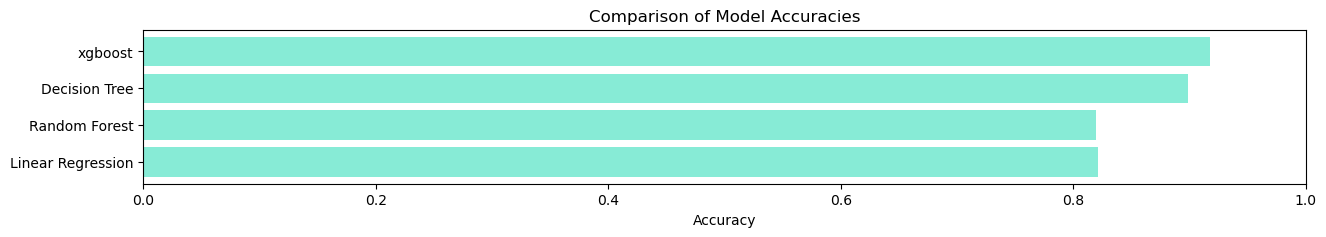

In [72]:
models = ['Linear Regression',  'Random Forest', 'Decision Tree','xgboost']
accuracies = [
   r2_lin, r2_rf,r2_dt ,r2_xgb
]

# Create the plot
plt.figure(figsize=(15,2))
plt.barh(models, accuracies, color='#87EBD6')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 1)  # Accuracy range from 0 to 1
plt.show()

# 5.Model Comparison 
Model Comparison Report

#### Performance Metrics
For each model, we use the following metrics:
<br>
- **MSE (Mean Squared Error):** Measures the average squared difference between predicted and actual values.
- **RMSE (Root Mean Squared Error):** The square root of MSE, showing average error in the same units as the target.
- **R² Score:** Indicates how well the model explains the variance of the target.
- **Training Time:** Time taken to train the model.
- **Inference Time:** Time taken to make predictions.
- **Model Complexity:** Resource usage, including memory and computation cost.

---

#### Results Summary



| **Model**                         | **MSE**    | **RMSE**    | **R² Score** | **Training Time** | **Inference Time** | **Model Complexity** |
|------------------------------------|------------|-------------|--------------|--------------------|---------------------|----------------------|
| Linear Regression                 | 0.17       | 0.35        | 0.82         | Fast               | Very Fast           | Low                  |
| Decision Tree Regressor           | 0.10       | 0.28        | 0.89         | Moderate           | Fast                | Moderate             |
| Random Forest Regressor           | 0.12       | 0.24        | 0.85         | Moderate           | Moderate            | High                 |
| XGBoost Regressor                 | 0.05       | 0.22        | 0.91         | Slow               | Fast                | High                 |


## Conclusion  

The PUBG winPlacePerc prediction project presented various challenges, including data preprocessing, feature selection, and model optimization. By employing systematic approaches and leveraging different machine learning models, we achieved strong performance in predicting player rankings.  